# Percentile , Z_Score  , IQR Technique

You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe.

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [1]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/1_outliers/bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [2]:
df['price_per_sqft'].head()

0    3699
1    4615
2    4305
3    6245
4    4250
Name: price_per_sqft, dtype: int64

# Percentile Method( quantile function)

In [3]:
max_threshold=df['price_per_sqft'].quantile(0.999)
max_threshold

50959.36200000099

In [4]:
min_threshold=df['price_per_sqft'].quantile(0.001)
min_threshold

1366.184

In [5]:
df_new=df[(df['price_per_sqft']<max_threshold) & (df['price_per_sqft']>min_threshold)]
df_new.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [6]:
df.shape

(13200, 7)

In [7]:
df.shape[0]

13200

In [8]:
df_new.shape

(13172, 7)

In [9]:
df_new.shape[0]

13172

In [10]:
df.shape[0]-df_new.shape[0]
#Total number of outliers = 28

28

In [14]:
df['price_per_sqft'].max()

12000000

In [15]:
df_new['price_per_sqft'].max()

50349

In [17]:
df['price_per_sqft'].min()

267

In [18]:
df_new['price_per_sqft'].min()

1379

In [21]:
df[(df['price_per_sqft']>max_threshold) | (df['price_per_sqft']<min_threshold)].shape

(28, 7)

In [22]:
df[(df['price_per_sqft']>max_threshold) | (df['price_per_sqft']<min_threshold)].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000


In [23]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [24]:
df_new.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13172.000000,13172.000000,13172.000000,13172.000000,13172.000000
mean,1537.861049,2.690100,111.591865,2.799651,6663.653735
std,967.123711,1.337026,145.372047,1.291130,4141.020700
min,250.000000,1.000000,8.000000,1.000000,1379.000000
25%,1100.000000,2.000000,50.000000,2.000000,4271.000000
50%,1274.500000,2.000000,71.550000,3.000000,5438.000000
75%,1670.000000,3.000000,120.000000,3.000000,7311.000000
max,30400.000000,40.000000,3600.000000,43.000000,50349.000000


# Using Standard Deviation and Zscore

In [11]:
df_new['price_per_sqft'].mean()

6663.6537351958705

In [12]:
df_new['price_per_sqft'].std()

4141.020700174605

In [13]:
df_new['z-score']=(df_new['price_per_sqft']-df_new['price_per_sqft'].mean())/df_new['price_per_sqft'].std()

C:\Users\Aayushi\Try\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
df_new.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z-score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [31]:
upper_bound=df_new['price_per_sqft'].mean()+4*df_new['price_per_sqft'].std()
upper_bound

23227.73653589429

In [32]:
lower_bound=df_new['price_per_sqft'].mean()-4*df_new['price_per_sqft'].std()
lower_bound

-9900.429065502549

In [34]:
df_new_no_outlier_stddev=df_new[(df_new['price_per_sqft']<upper_bound) & (df_new['price_per_sqft']>lower_bound)]
df_new_no_outlier_stddev.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z-score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [35]:
df_new_no_outlier_stddev.shape

(13047, 8)

In [37]:
df_new.shape

(13172, 8)

In [38]:
df_new.shape[0]-df_new_no_outlier_stddev.shape[0]

125

In [40]:
df_new_no_outlier_stddev['price_per_sqft'].max()

23214

In [41]:
df_new_no_outlier_stddev['price_per_sqft'].min()

1379

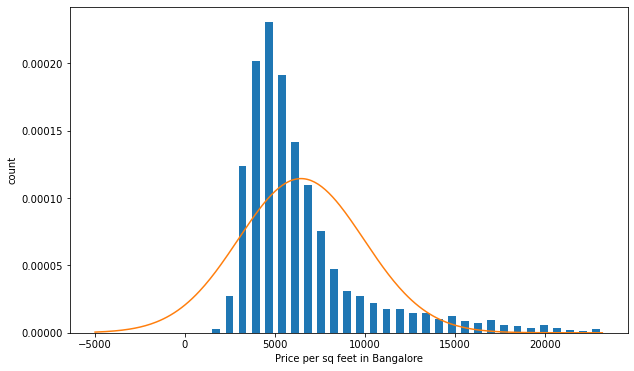

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(df_new_no_outlier_stddev.price_per_sqft,bins=30,rwidth=0.6,density=True)
plt.xlabel('Price per sq feet in Bangalore')
plt.ylabel('count')

from scipy.stats import norm
import numpy as np
rng=np.arange(-5000,df_new_no_outlier_stddev.price_per_sqft.max(),100)
plt.plot(rng,norm.pdf(rng,df_new_no_outlier_stddev.price_per_sqft.mean(),df_new_no_outlier_stddev.price_per_sqft.std()))

In [70]:
df_new_no_outlier_stddev.price_per_sqft.mean()

6449.328044761248

In [71]:
df_new_no_outlier_stddev.price_per_sqft.median()

5415.0

In [72]:
df_new_no_outlier_stddev.price_per_sqft.mode()

0    5000
dtype: int64

# Above is a right skewed graph which means mean>median>mode

In [78]:
bool(6449>5415>5000)

True

In [ ]:
# In case of left skewed graph, mean<median<mode

# IQR(Inter Quantile Range)